Police Dataset

Project Outlines

Descriptive Analysis:

<li>Calculate summary statistics for numerical columns like driver_age and driver_age_raw.</li>
<li>Analyze the distribution of driver ages, races, genders, and violation types.</li>
<li>Determine the most common violations and outcomes of stops.</li>

Time-Based Analysis:

<li>Analyze the distribution of traffic stops over different days of the week, months, or years.</li>
<li>Identify any patterns in the time of day when most stops occur.</li>
<li>Explore if there are certain days or times when certain violations are more common.</li>

Gender and Race Analysis:

<li>Investigate whether there are disparities in the frequency of stops, outcomes, or violations based on driver gender and race.</li>
<li>Calculate the proportions of different races and genders involved in traffic stops.</li>

Violation Analysis:

<li>Group and summarize data based on different types of violations.</li>
<li>Analyze the correlation between violations and stop outcomes (e.g., citation, arrest).</li>

Search and Arrest Analysis:

<li>Examine the frequency of searches conducted during stops.</li>
<li>Analyze the types of searches performed and their outcomes.</li>
<li>Investigate whether there are any trends or disparities in arrests based on different factors.</li>

Duration Analysis:

<li>Explore the distribution of stop durations.</li>
<li>Analyze whether the duration of stops varies based on factors like violations or search conducted.</li>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("3. Police Data.csv")

In [3]:
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
df.shape

(65535, 15)

In [5]:
df.isnull().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

In [6]:
df.dtypes

stop_date              object
stop_time              object
country_name          float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [7]:
df.drop(columns=["country_name", "search_type"], inplace= True)

In [8]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [9]:
df.shape

(65535, 13)

##### Summary Statistics:
Calculate basic summary statistics for numerical columns like driver_age_raw and driver_age. These statistics include mean, median, standard deviation, minimum, and maximum values. You can use Python's pandas library to achieve this.

In [10]:
df.describe()

,driver_age_raw,driver_age
count,61481.000000,61228.000000
mean,1967.791106,34.148984
std,121.050106,12.760710
min,0.000000,15.000000
25%,1965.000000,23.000000
50%,1978.000000,31.000000
75%,1985.000000,43.000000
max,8801.000000,88.000000


##### Distribution Analysis:
Create histograms or density plots to visualize the distribution of numerical variables like driver age. This will give you insights into the age distribution of the drivers in your dataset.

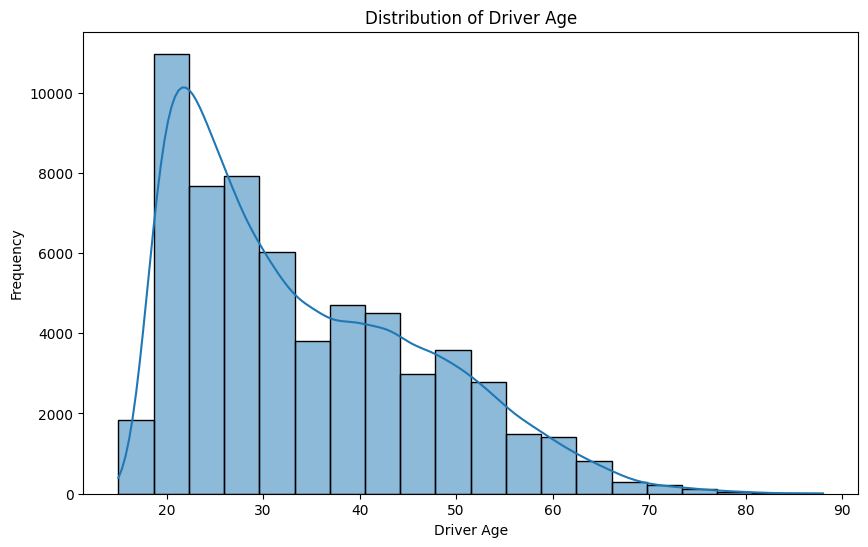

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='driver_age', bins=20, kde=True)
plt.xlabel('Driver Age')
plt.ylabel('Frequency')
plt.title('Distribution of Driver Age')
plt.show()

##### Categorical Analysis:
For categorical variables like driver_gender, driver_race, and violation, you can calculate the counts of each category and visualize them using bar plots.

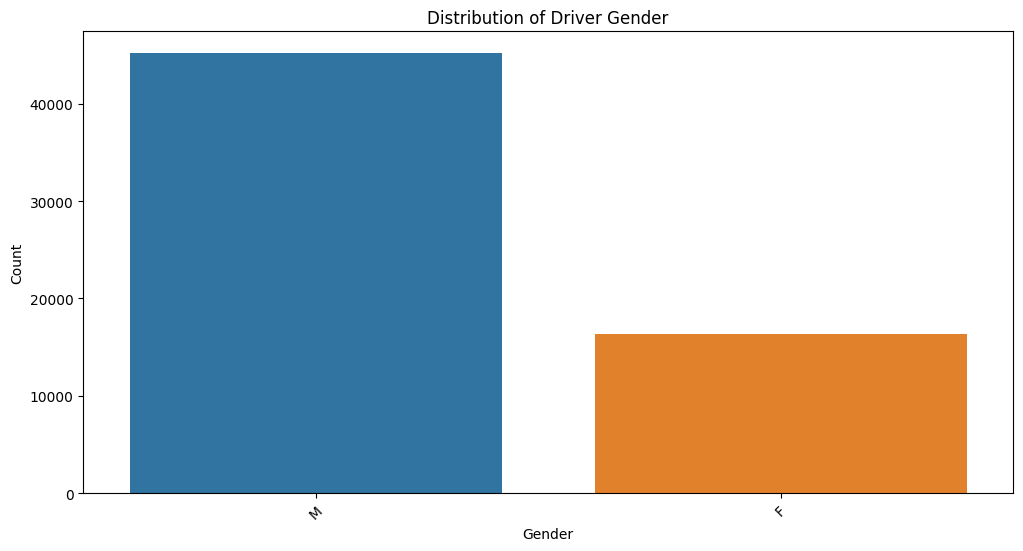

In [12]:
# Calculate counts for categorical variables
gender_counts = df['driver_gender'].value_counts()
race_counts = df['driver_race'].value_counts()
violation_counts = df['violation'].value_counts()

# Create bar plots
plt.figure(figsize=(12, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Driver Gender')
plt.xticks(rotation=45)
plt.show()

##### Violation Analysis:
Analyze the most common violations and their frequencies.

In [13]:
df['violation'].value_counts()

Speeding               37204
Moving violation       11926
Equipment               6516
Other                   3583
Registration/plates     2243
Seat belt                  3
Name: violation, dtype: int64

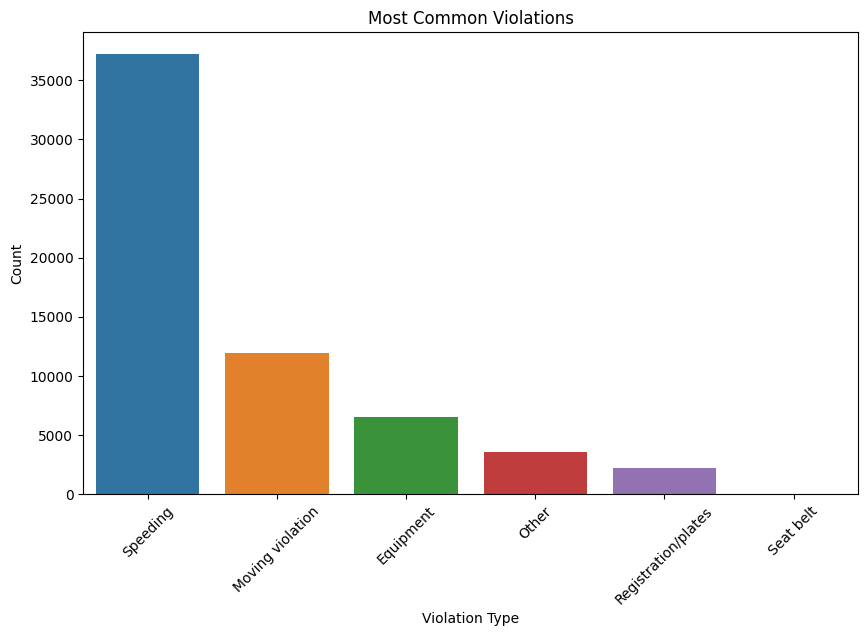

In [14]:
# Create a bar plot for violation counts
plt.figure(figsize=(10, 6))
sns.barplot(x=violation_counts.index, y=violation_counts.values)
plt.xlabel('Violation Type')
plt.ylabel('Count')
plt.title('Most Common Violations')
plt.xticks(rotation=45)
plt.show()


Gender Analysis:
Analyze the distribution of traffic stops based on driver gender.

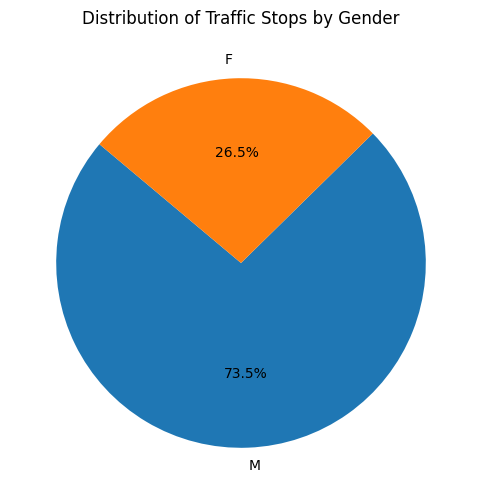

In [19]:
# Calculate gender counts
gender_counts = df['driver_gender'].value_counts()

# Create a pie chart for gender distribution
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140 )
plt.title('Distribution of Traffic Stops by Gender')
plt.show()

Race Analysis:
Analyze the distribution of traffic stops based on driver race.

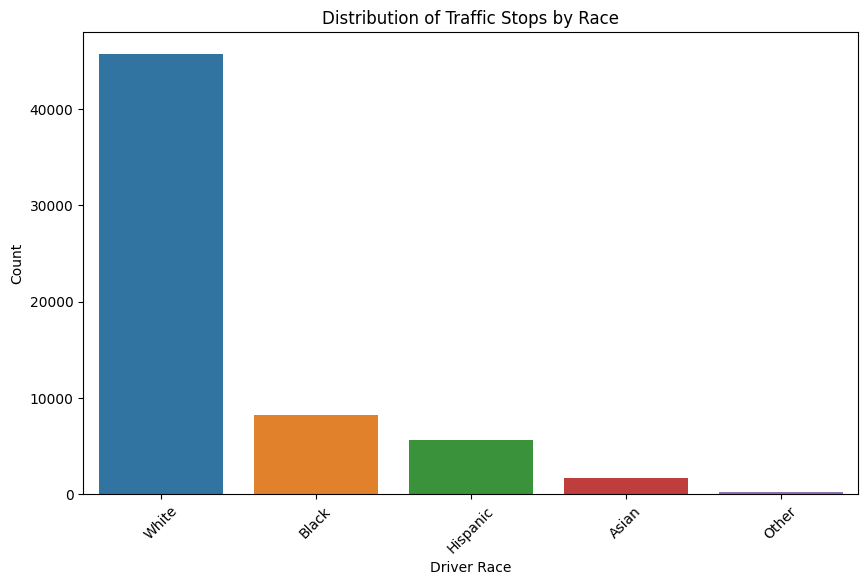

In [20]:
# Calculate race counts
race_counts = df['driver_race'].value_counts()

# Create a bar plot for race distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=race_counts.index, y=race_counts.values)
plt.xlabel('Driver Race')
plt.ylabel('Count')
plt.title('Distribution of Traffic Stops by Race')
plt.xticks(rotation=45)
plt.show()


Gender and Race Interaction:
Explore whether there are any differences in violations or outcomes based on both gender and race.

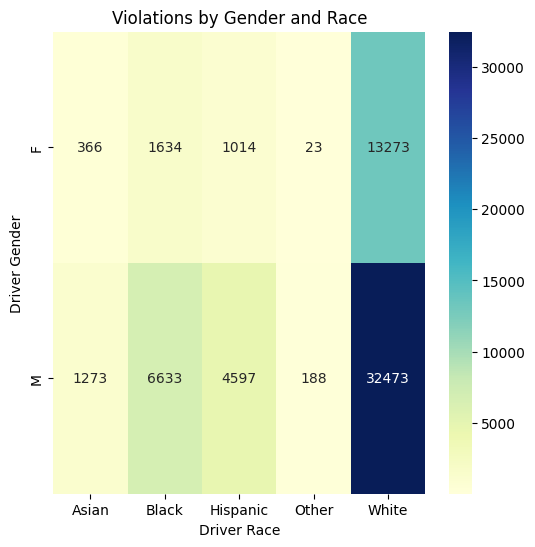

In [26]:
#Create a heatmap of violations and outcomes by gender and race
gender_race_analysis = df.pivot_table(index='driver_gender', columns='driver_race', values='violation', aggfunc='count')
plt.figure(figsize=(6, 6))
sns.heatmap(gender_race_analysis,cmap='YlGnBu', annot=True, fmt='d')
plt.xlabel('Driver Race')
plt.ylabel('Driver Gender')
plt.title('Violations by Gender and Race')
plt.show()


In [23]:
gender_race_analysis = df.pivot_table(index='driver_gender', columns='driver_race', values='violation', aggfunc='count')
print(gender_race_analysis)

driver_race    Asian  Black  Hispanic  Other  White
driver_gender                                      
F                366   1634      1014     23  13273
M               1273   6633      4597    188  32473


Violation Outcomes:
Analyze the outcomes (such as citations or arrests) associated with different violation types.

In [ ]:
# Create a pivot table for violation outcomes
violation_outcomes = df.pivot_table(index='violation', columns='stop_outcome', values='driver_gender', aggfunc='count')
print(violation_outcomes)
# Create a stacked bar plot for violation outcomes
plt.figure(figsize=(12, 6))
violation_outcomes.plot(kind='bar', stacked=True)
plt.xlabel('Violation Type')
plt.ylabel('Count')
plt.title('Outcomes by Violation Type')
plt.xticks(rotation=45)
plt.legend(title='Stop Outcome')
plt.show()


Violation and Search Conducted:
Explore whether certain violation types are more likely to result in searches being conducted.

In [ ]:
# Create a pivot table for violation and search conducted
violation_search = df.pivot_table(index='violation', columns='search_conducted', values='driver_gender', aggfunc='count')

# Create a stacked bar plot for violation and search conducted
plt.figure(figsize=(12, 6))
violation_search.plot(kind='bar', stacked=True)
plt.xlabel('Violation Type')
plt.ylabel('Count')
plt.title('Search Conducted by Violation Type')
plt.xticks(rotation=45)
plt.legend(title='Search Conducted')
plt.show()


Search Conducted Analysis:
Analyze the frequency of searches conducted during traffic stops and their outcomes.

In [ ]:
# Calculate search conducted counts
search_counts = df['search_conducted'].value_counts()

# Create a pie chart for search conducted distribution
plt.figure(figsize=(6, 6))
plt.pie(search_counts, labels=search_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Search Conducted during Traffic Stops')
plt.show()

Search Type Analysis:
If available, analyze the different types of searches conducted during traffic stops.

In [ ]:
# Calculate search type counts
search_type_counts = df['search_conducted'].value_counts()

# Create a bar plot for search type counts
plt.figure(figsize=(10, 6))
sns.barplot(x=search_type_counts.index, y=search_type_counts.values)
plt.xlabel('Search Type')
plt.ylabel('Count')
plt.title('Distribution of Search Types')
plt.xticks(rotation=45)
plt.show()


Arrest Analysis:
Analyze the frequency of arrests made during traffic stops and the distribution of arrest outcomes.

In [ ]:
# Calculate arrest counts
arrest_counts = df['is_arrested'].value_counts()

# Create a pie chart for arrest distribution
plt.figure(figsize=(6, 6))
plt.pie(arrest_counts, labels=arrest_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Arrests during Traffic Stops')
plt.show()


Search and Arrest Relationship:
Explore whether searches are more likely to lead to arrests.

In [ ]:
# Create a pivot table for search and arrest relationship
search_arrest = df.pivot_table(index='search_conducted', columns='is_arrested', values='driver_gender', aggfunc='count')

# Create a stacked bar plot for search and arrest relationship
plt.figure(figsize=(8, 6))
search_arrest.plot(kind='bar', stacked=True)
plt.xlabel('Search Conducted')
plt.ylabel('Count')
plt.title('Search and Arrest Relationship')
plt.xticks(rotation=0)
plt.legend(title='Is Arrested')
plt.show()


Date and Time Parsing:
If your dataset has separate columns for stop_date and stop_time, you can combine them into a single datetime column for better analysis.

In [ ]:
# Combine date and time columns into a single datetime column
df['stop_datetime'] = pd.to_datetime(df['stop_date'].astype(str) + ' ' + df['stop_time'].astype(str))

# Extract day of the week and hour of the day
df['day_of_week'] = df['stop_datetime'].dt.day_name()
df['hour_of_day'] = df['stop_datetime'].dt.hour

In [ ]:
df.head()

Day of the Week Analysis:
Analyze the distribution of traffic stops over different days of the week.

In [ ]:

# Calculate day of the week counts
day_counts = df['day_of_week'].value_counts()

# Create a bar plot for day of the week counts
plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Distribution of Traffic Stops by Day of the Week')
plt.xticks(rotation=45)
plt.show()


Hour of the Day Analysis:
Analyze the distribution of traffic stops over different hours of the day.

In [ ]:
# Calculate hour of the day counts
hour_counts = df['hour_of_day'].value_counts()

# Create a line plot for hour of the day counts
plt.figure(figsize=(12, 6))
sns.lineplot(x=hour_counts.index, y=hour_counts.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Distribution of Traffic Stops by Hour of the Day')
plt.show()


Time-Based Violation Analysis:
Explore whether there are certain days or hours when specific violations are more common.

In [ ]:
# Create a heatmap of violations by day of the week and hour of the day
violations_by_time = df.pivot_table(index='day_of_week', columns='hour_of_day', values='violation', aggfunc='count')
plt.figure(figsize=(12, 8))
sns.heatmap(violations_by_time, cmap='YlGnBu', annot=True, fmt='d')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.title('Violations by Day of the Week and Hour of the Day')
plt.show()


In [ ]:
#For Speeding were men or women stopped more often?
df[df.violation=='Speeding'].driver_gender.value_counts()

In [ ]:
#Does gender affect who gets searched during a stop?
df.groupby("driver_gender").search_conducted.sum()

In [ ]:
df.search_conducted.value_counts()

In [ ]:
#What is the mean of stop_duration?
df.stop_duration.value_counts()

In [ ]:
df["stop_duration"]=df["stop_duration"].map({'0-15 Min':7.5,'16-30 Min':24, '30+ Min':45})

In [ ]:
df.head(2)

In [ ]:
df["stop_duration"].mean()

In [ ]:
#Compare age distrubition for each viloation
df.groupby('violation').driver_age.describe()

In [ ]:
#compare race and drugs_related_stop
df.groupby('drugs_related_stop').driver_race.value_counts()

In [ ]:
df.groupby('stop_duration').driver_race.value_counts()

In [ ]:

# Create histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='driver_age', bins=20, kde=True)
plt.xlabel('Driver Age')
plt.ylabel('Frequency')
plt.title('Distribution of Driver Age')
plt.show()